# **Project Name - Yes Bank Stock Closing Price Prediction**    



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 - Soorya K S**

# **Project Summary -**

Yes Bank is a well reputed bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Due to this reason, it was interesting to know how the stock prices got impacted and whether Time series or predictive models provided a solution to this problem. The dataset contains monthy stock prices of the bank since it's inception and includes closing, starting, highest and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this project is to predict the stock's closing price based on the required parameters provided.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
yb_df = pd.read_csv('/content/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
yb_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
yb_df.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
yb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
yb_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
yb_df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


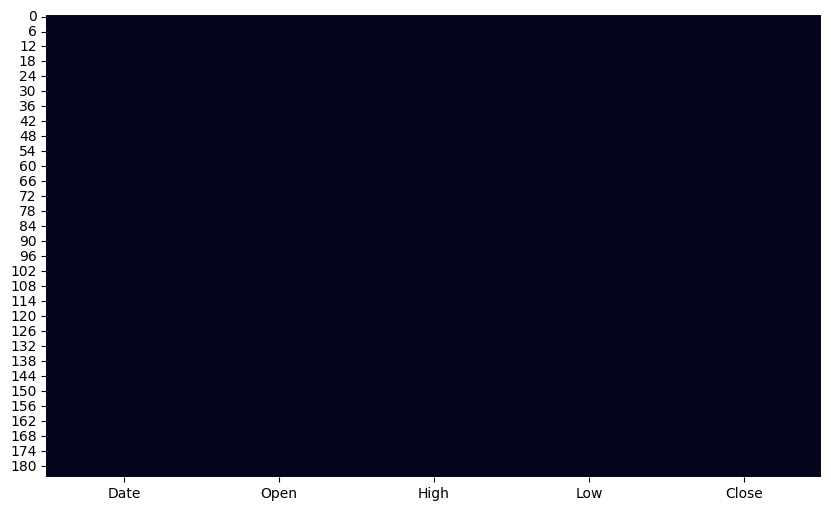

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(yb_df.isnull(),cbar=False)
plt.show()

### What did you know about your dataset?

The dataset contains 185 monthly records of Yes Bank's stock prices, with the columns Date, Open, High, Low, Close. There is no miising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
yb_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
yb_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

- Date: The month and year (currently in "MMM-YY" format as an object/string).
- Open: The stock's opening price.
- High: The highest price in that month.
- Low: The lowest price in that month.
- Close: The closing price (our target variable).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
yb_df.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
yb_df['Date'] = pd.to_datetime(yb_df['Date'], format='%b-%y')

yb_df.sort_values(by='Date').reset_index(drop=True)

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


### What all manipulations have you done and insights you found?

The Date column is in "MMM-YY" format as an object/string. So converted the Date column to a proper datetime format.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Closing Price Trend Over Time

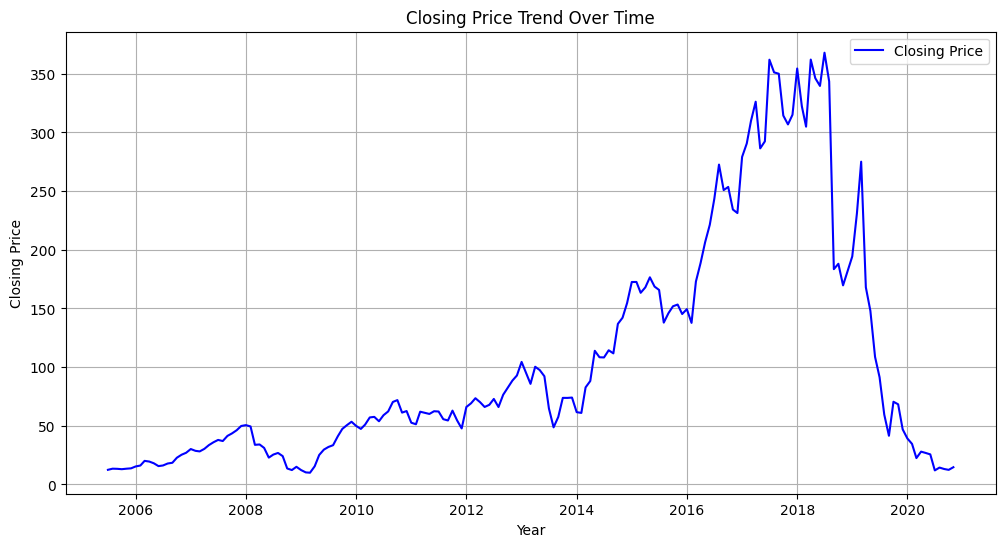

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(12,6))
plt.plot(yb_df['Date'], yb_df['Close'], color='blue', label='Closing Price')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is the best way to visualize trends over time. It helps to see how Yes Bank's stock performed historically and identify major fluctuations.

##### 2. What is/are the insight(s) found from the chart?

* The stock price increased sharply from 2014 to 2018, reaching its peak
* A steep fall is observed from 2018 onwards, reaching almost negligible levels by 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding past patterns can guide future investment strategies and risk management.
* The steep decline post-2018 indicates a loss of investor trust, financial instability, and regulatory challenges.
* This chart provides critical insights into how market perception, fraud, and financial instability impact stock performance.


#### Chart - 2: Distribution of Opening Prices

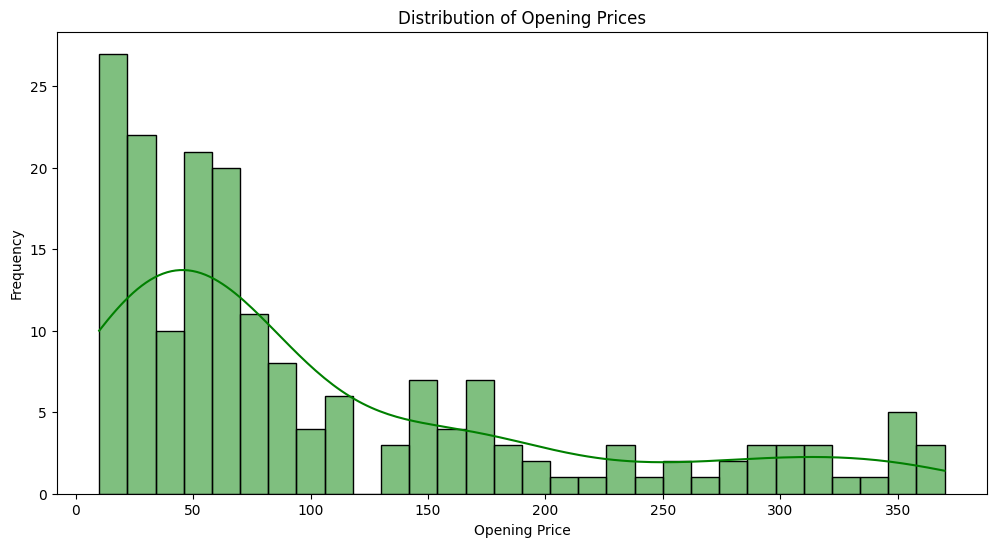

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 6))
sns.histplot(yb_df['Open'], bins=30, kde=True,color='green')
plt.xlabel('Opening Price')
plt.ylabel('Frequency')
plt.title('Distribution of Opening Prices')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for understanding how opening prices are distributed over time.

##### 2. What is/are the insight(s) found from the chart?

* Right-Skewed Distribution: Most opening prices are concentrated between ₹10 and ₹100, indicating that the stock traded at lower levels most of the time.
* A significant number of opening prices fall in the ₹10-50 range, likely representing the post-2018 stock crash. This suggests that after the Yes Bank crisis, the stock mostly opened at very low prices.
* The wide range of prices (₹10 - ₹370) suggests that Yes Bank's stock experienced high volatility.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Helps investors understand risk levels and plan investment strategies based on past stock movements. If similar volatility patterns emerge, traders can leverage technical analysis for better predictions.
* The decline in frequent high-price openings suggests a loss of investor confidence. The presence of many low opening prices can signal market distrust and financial instability.


#### Chart - 3: Distribution of High Prices

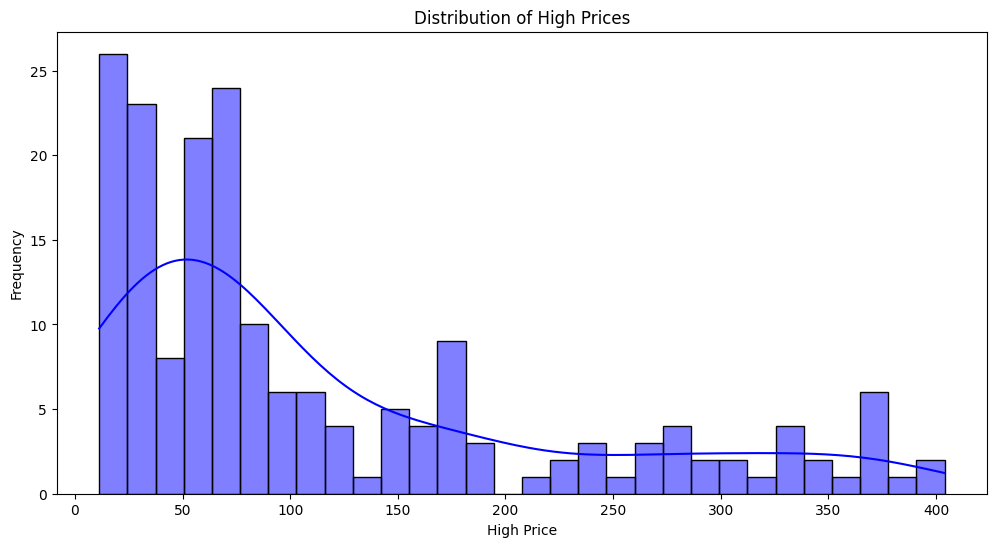

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 6))
sns.histplot(yb_df['High'], bins=30, kde=True, color='blue')
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.title('Distribution of High Prices')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE is used to understand how the highest stock prices varied over time.
It helps in identifying market phases, such as bullish trends (high peaks) and bearish trends (low prices).

##### 2. What is/are the insight(s) found from the chart?

* Most high prices are below ₹100, indicating that the stock mostly traded at lower values. Very few instances of stock prices above ₹300-400, meaning such high values were temporary peaks.
* Similar to the Opening Price distribution, most high prices are clustered in the ₹10-100 range.
* Some high values (above ₹350) are present but occurred infrequently, likely during periods of market speculation.
The wide spread confirms Yes Bank’s stock had extreme volatility.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The presence of historically high values shows that the stock was once a strong investment option.
* The lack of sustained high values suggests that the stock failed to maintain growth, leading to investor distrust.
* The frequent low peaks reflect market uncertainty, discouraging long-term investors.
* Majority of high prices are low, confirming the long-term decline of Yes Bank's stock.
* To regain investor confidence, Yes Bank must focus on stabilizing stock performance and improving financial health.

#### Chart - 4: Distribution of Low Prices

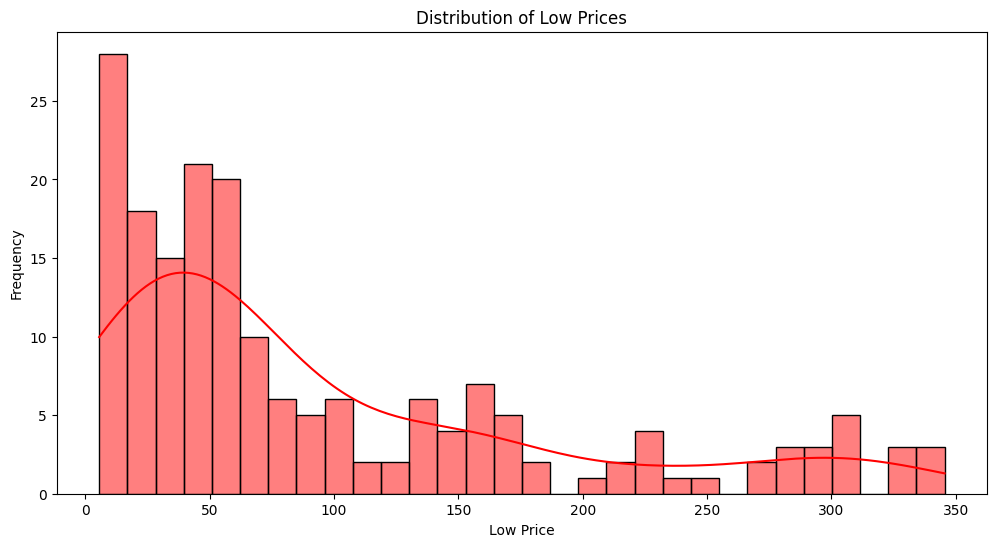

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 6))
sns.histplot(yb_df['Low'], bins=30, kde=True, color='red')
plt.xlabel('Low Price')
plt.ylabel('Frequency')
plt.title('Distribution of Low Prices')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE helps visualize how frequently the stock hit low prices over time.
Understanding low price trends is crucial for analyzing stock downturns and risk factors.


##### 2. What is/are the insight(s) found from the chart?

* A majority of the low prices fall in the ₹10-100 range, meaning the stock spent a significant amount of time trading at lower levels.
* The stock had fewer instances where the low price was above ₹250-300, indicating that high valuations were unsustainable.
* Most data points are clustered towards lower values, supporting the fact that the stock declined significantly post-2018.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding historical low points can help investors identify strong support levels for future investments. If the stock stabilizes, traders can use this data for risk assessment & entry point decisions.
* The frequent occurrence of very low prices suggests high financial risk and a lack of investor confidence.
* The majority of low prices being at the lower end (₹10-100) confirms long-term underperformance and instability.
* To rebuild investor confidence, Yes Bank must focus on financial restructuring, strong governance, and sustainable business growth.

#### Chart - 5: Distribution of Closing Prices

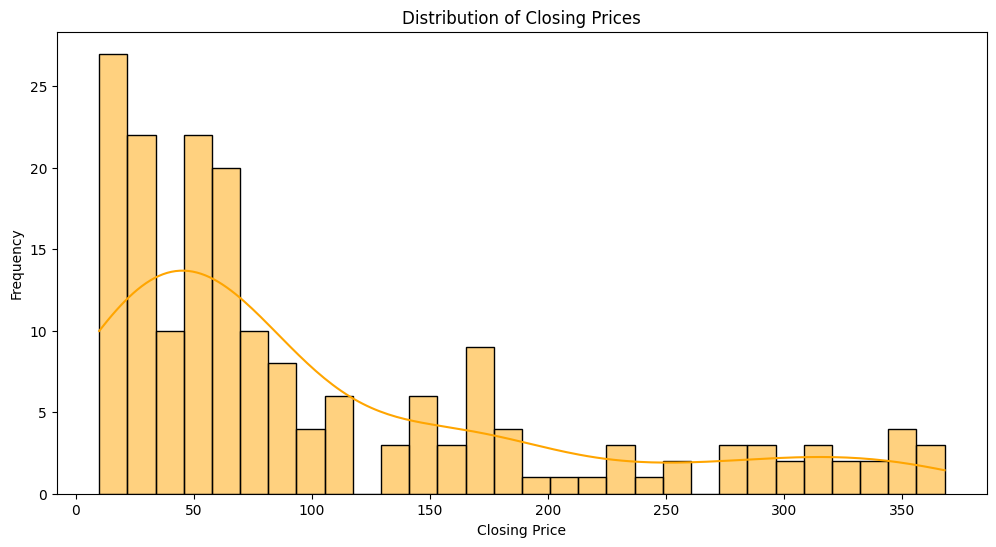

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 6))
sns.histplot(yb_df['Close'], bins=30, kde=True, color='orange')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE is useful to examine how frequently Yes Bank's closing stock prices fell into different ranges.

##### 2. What is/are the insight(s) found from the chart?

* A majority of closing prices fall below ₹100, indicating that the stock struggled to hold higher values for extended periods.
* Prices above ₹250-350 are rare, showing that Yes Bank’s strong performance periods were short-lived.
* A peak in lower values (~₹10-50) suggests that after the 2018 crisis, the stock rarely recovered to previous highs.
* The steep crashes post-2018 reflect the impact of financial instability and governance concerns on market valuation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The stock once traded at high values, proving that it had strong market demand historically.
* The majority of closing prices being below ₹100 reflects long-term weakness and a lack of investor trust.
* The low concentration of high closing prices confirms that Yes Bank’s stock has struggled to sustain growth after 2018.


#### Chart - 6: Opening Price vs Closing Price

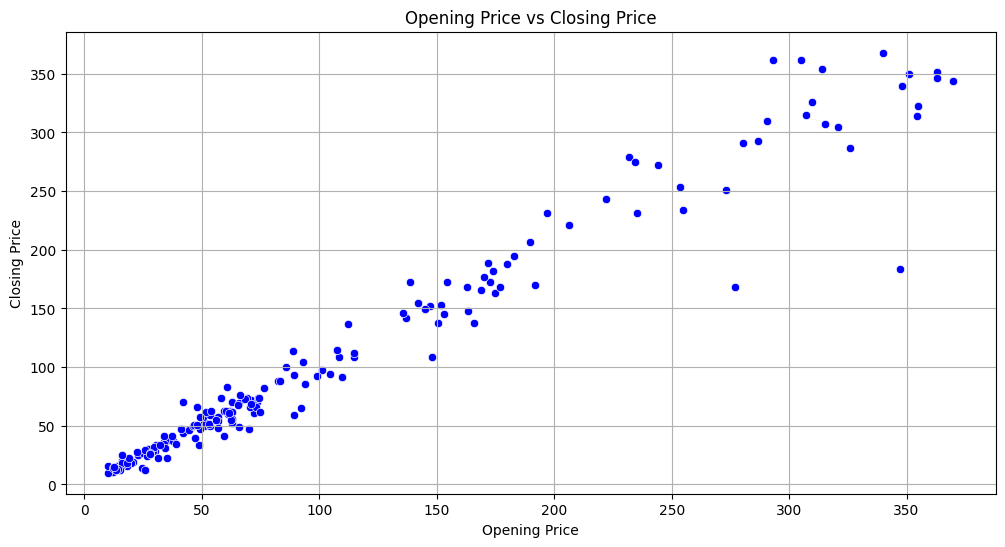

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 6))
sns.scatterplot(data=yb_df, x='Open', y='Close', color='blue')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.title('Opening Price vs Closing Price')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is useful to examine the relationship between opening and closing prices of Yes Bank stock.


##### 2. What is/are the insight(s) found from the chart?

* The points follow a clear upward trend, indicating that when the opening price is high, the closing price is also high.
* Although the trend is mostly linear, some points deviate from the line, showing that on certain occasions, the closing price differed significantly from the opening price.
* At lower price ranges (₹0 - ₹100), data points are tightly packed, meaning the price was more stable in that range.
* At higher prices (₹150 - ₹350), there is more scatter, suggesting that during high-value periods, the stock fluctuated more throughout the day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The strong correlation between opening and closing prices indicates predictability, which is good for traders and investors.
* Yes Bank's stock price generally follows a predictable pattern, with the closing price closely following the opening price. However, at higher price levels, volatility increases, suggesting a lack of long-term stability.


#### Chart - 7: Highest Price vs Lowest Price

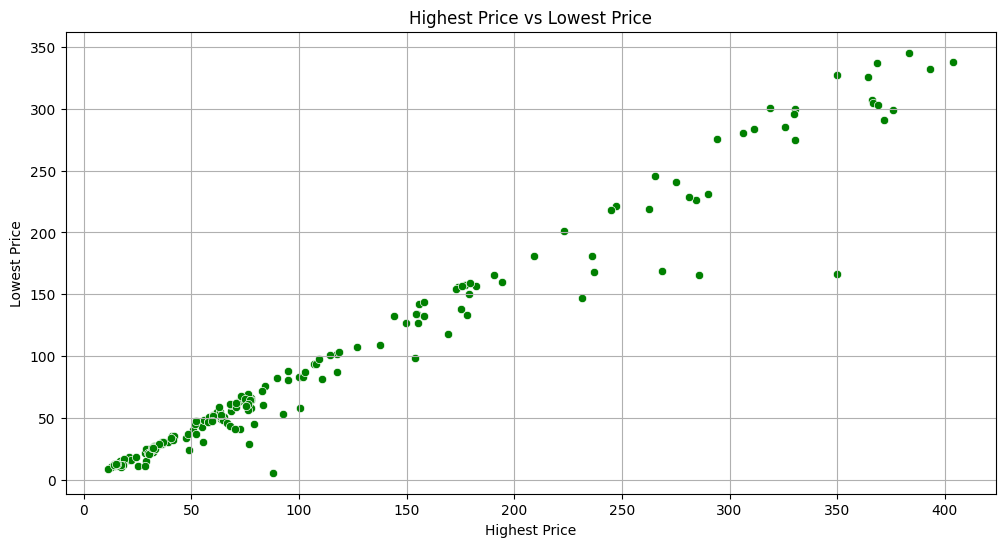

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(12, 6))
sns.scatterplot(data=yb_df, x='High', y='Low', color='green')
plt.xlabel('Highest Price')
plt.ylabel('Lowest Price')
plt.title('Highest Price vs Lowest Price')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot between highest and lowest prices helps in understanding the intraday price range and volatility of Yes Bank’s stock.


##### 2. What is/are the insight(s) found from the chart?

* The points are closely aligned along a diagonal line, indicating that when the highest price is high, the lowest price is also high on the same day.
* At lower price levels (₹0 - ₹100), the variation is minimal, indicating relatively stable intraday movements.
* At higher price levels (₹150 - ₹400), the spread increases, meaning that as the stock price rose, it also became more volatile within the day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The strong correlation between highest and lowest prices suggests that the stock did not experience extreme, unpredictable swings most of the time.
* To maintain investor confidence and prevent market panic, the bank should improve financial transparency, risk management, and investor communication.


#### Chart - 8: Monthly Average Closing Price Trend

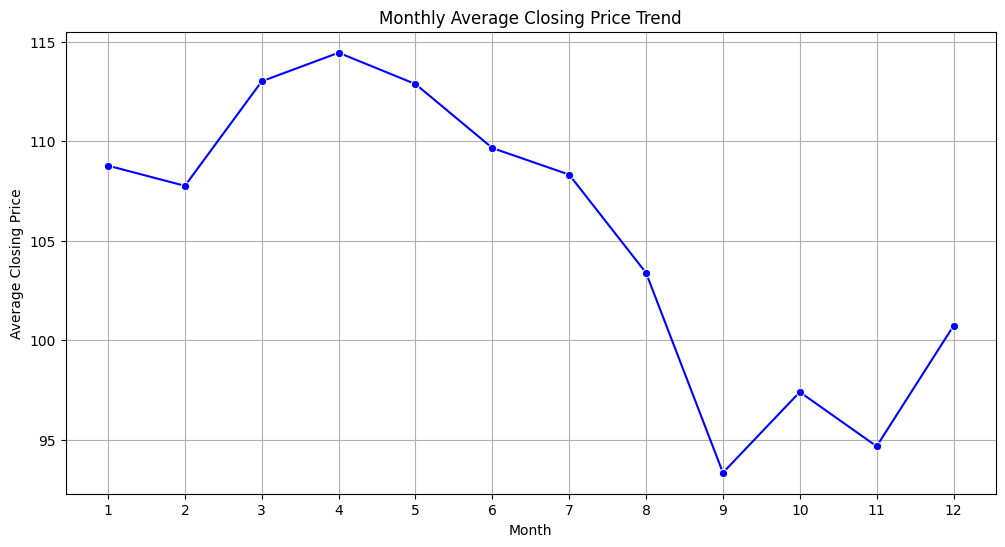

In [ ]:
# Chart - 8 visualization code
yb_df['Month'] = yb_df['Date'].dt.month

monthly_avg = yb_df.groupby('Month')['Close'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.title('Monthly Average Closing Price Trend')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Shows trends over time: It effectively visualizes how the average closing price fluctuates over the months. Easy comparison: The upward and downward movements clearly highlight seasonal patterns.

##### 2. What is/are the insight(s) found from the chart?

* The highest average closing price occurs in April.
* Prices fall consistently, with the lowest point in September.
* After September’s dip, the prices start recovering in October and December.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* If the price peaks in April, businesses can capitalize on this trend by increasing investments or marketing efforts before the rise.
* The low in September suggests a potential buying opportunity for investors before the prices go back up.
* If the decline is not addressed, it could lead to financial losses for businesses dependent on stock performance.

#### Chart - 9: Correlation Heatmap of Stock Prices

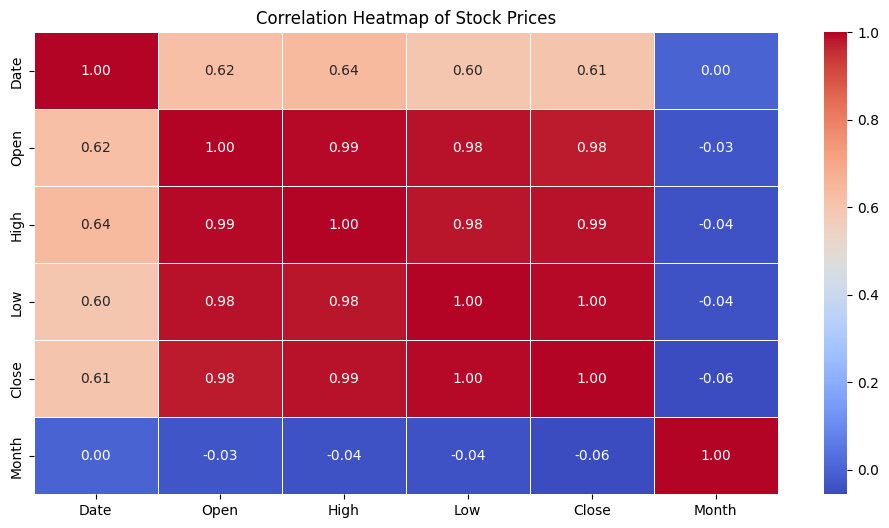

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(12, 6))
sns.heatmap(yb_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Stock Prices')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap visually represents how closely related different stock price variables (Open, High, Low, Close) are.

##### 2. What is/are the insight(s) found from the chart?

* Strong Correlation Among Price Variables: Open vs High → 0.99, Open vs Close → 0.98, High vs Close → 0.99, Low vs Close → 1.00
* All price metrics are highly correlated, meaning if one increases, others tend to follow.
* The strongest correlation is between Low and Close prices (1.00), indicating that stocks tend to close near the lowest price of the day.
* The correlation between Date and Prices is moderate (0.60 - 0.64), indicating a slight upward trend in stock prices over time.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10: Pairplot (Relationships between all numerical variables)

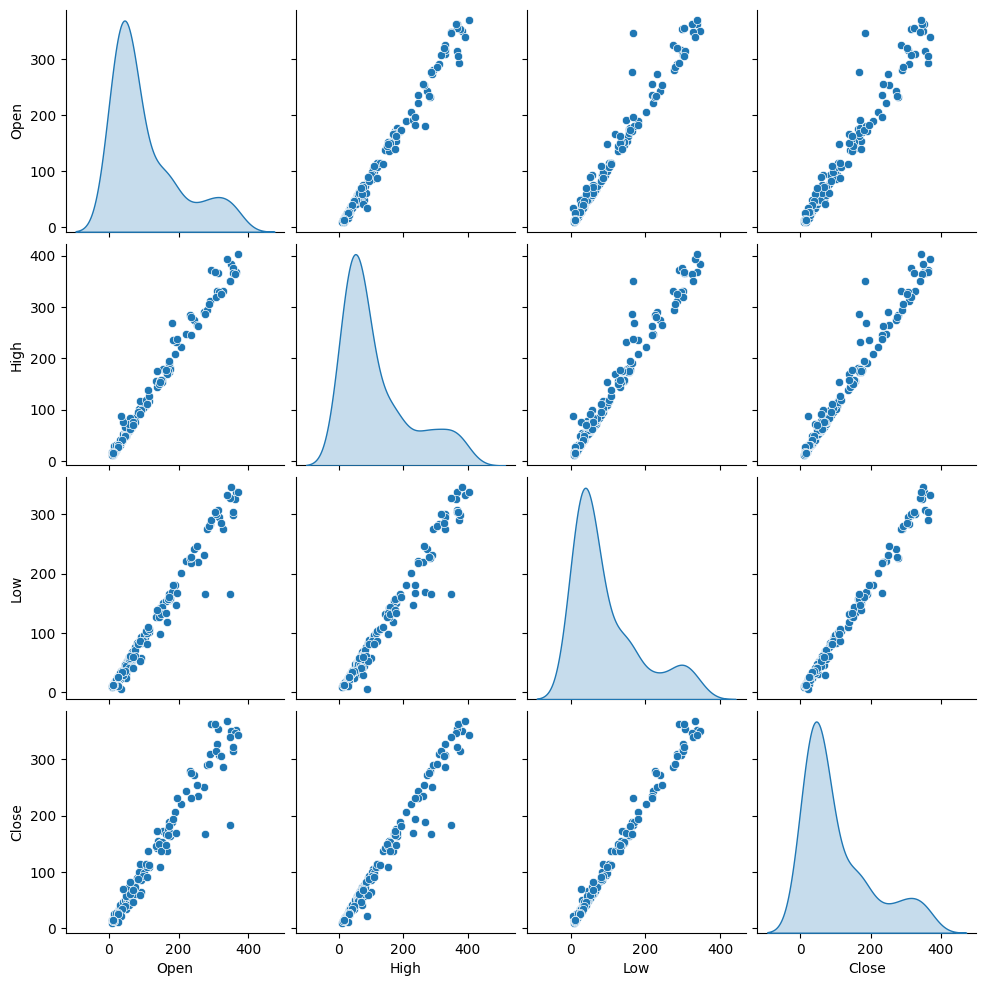

In [ ]:
# Chart - 10 visualization code
sns.pairplot(yb_df[['Open', 'High', 'Low', 'Close']], diag_kind='kde')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot helps visualize relationships between multiple numerical variables by displaying scatter plots and distribution plots.

##### 2. What is/are the insight(s) found from the chart?

* The scatter plots show tight clustering along a diagonal line, indicating a strong positive correlation between Open, High, Low, and Close prices.
* The diagonal plots show that stock prices have a right-skewed distribution. This means there are more lower price values, with a few high outliers.
* There are no extreme deviations in the scatter plots, meaning stock prices move in a consistent pattern without major irregularities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

- Hypothesis 1: The average closing price in the first half of the year (Jan-Jun) is higher than in the second half (Jul-Dec).
- Hypothesis 2: The daily opening price and closing price have no significant difference.
- Hypothesis 3: The variance of stock prices is the same.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis (H0): The average closing price in Jan-Jun is equal to or less than in Jul-Dec.
* Alternate hypothesis (H1): The average closing price in Jan-Jun is greater than in Jul-Dec.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

#split the data into two groups based on month
jan_jun = yb_df[yb_df['Month'] <= 6]['Close']
jul_dec = yb_df[yb_df['Month'] > 6]['Close']

t_stat, p_value = stats.ttest_ind(jan_jun, jul_dec, alternative='greater')

print(f'T-statistic: {t_stat}, P-value: {p_value}')

if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

T-statistic: 0.7894206232699421, P-value: 0.21544391058012663
Fail to reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

Independent t-test

##### Why did you choose the specific statistical test?

To compare two independent groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis (H0): There is no significant difference between opening and closing prices.
* Alternate hypothesis (H1): There is a significant difference between opening and closing prices.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
t_stat, p_value = stats.ttest_rel(yb_df['Open'], yb_df['Close'])

print(f'T-statistic: {t_stat}, P-value: {p_value}')

if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

T-statistic: 0.220963420803944, P-value: 0.825365920365391
Fail to reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

Paired t-test

##### Why did you choose the specific statistical test?

To compare two related samples.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis (H0): The variances of high and low prices are equal.
* Alternate hypothesis (H1): The variances of high and low prices are different.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
f_stat, p_value = stats.levene(yb_df['High'], yb_df['Low'])

print(f'F-statistic: {f_stat}, P-value: {p_value}')

if p_value < 0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

F-statistic: 1.7903838737546234, P-value: 0.18170560683146086
Fail to reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

F-test (Levene’s test for equal variances)

##### Why did you choose the specific statistical test?

To compare the variance between two groups.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
df = yb_df.copy()

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Month,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
 5   Month   185 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 8.1 KB


#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing value in this dataset.

### 2. Handling Outliers

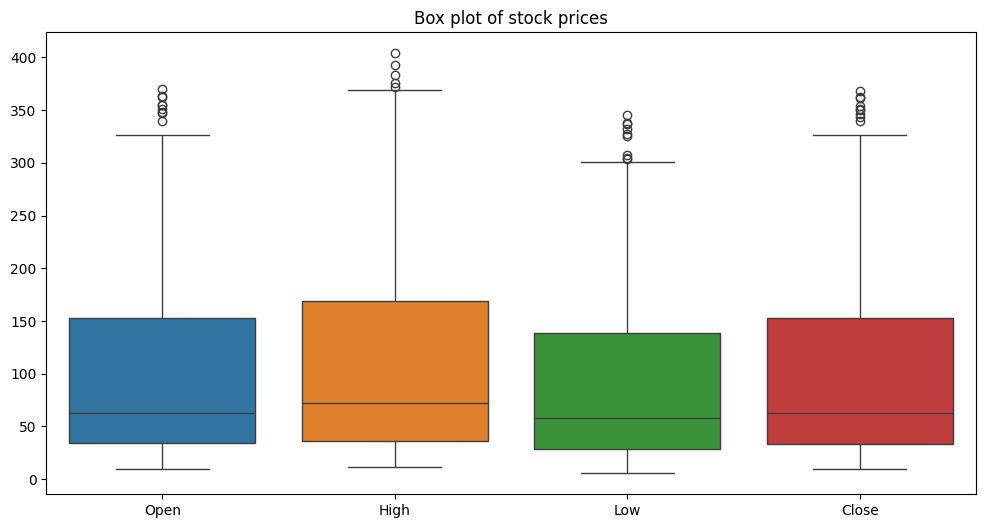

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(12, 6))
sns.boxplot(df[['Open', 'High', 'Low', 'Close']])
plt.title('Box plot of stock prices')
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply Winsorization
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

# Verify changes
print(df.describe())


                                Date        Open        High         Low  \
count                            185  185.000000  185.000000  185.000000   
mean   2013-03-01 19:04:12.972973056  104.213189  115.516703   93.857081   
min              2005-07-01 00:00:00   13.300000   14.900000   11.480000   
25%              2009-05-01 00:00:00   33.800000   36.140000   28.510000   
50%              2013-03-01 00:00:00   62.980000   72.550000   58.000000   
75%              2017-01-01 00:00:00  153.000000  169.190000  138.350000   
max              2020-11-01 00:00:00  326.000000  364.400000  300.650000   
std                              NaN   95.405669  104.687287   88.233973   

            Close       Month  
count  185.000000  185.000000  
mean   103.964378    6.567568  
min     13.300000    1.000000  
25%     33.450000    4.000000  
50%     62.540000    7.000000  
75%    153.300000   10.000000  
max    326.140000   12.000000  
std     95.320715    3.446332  


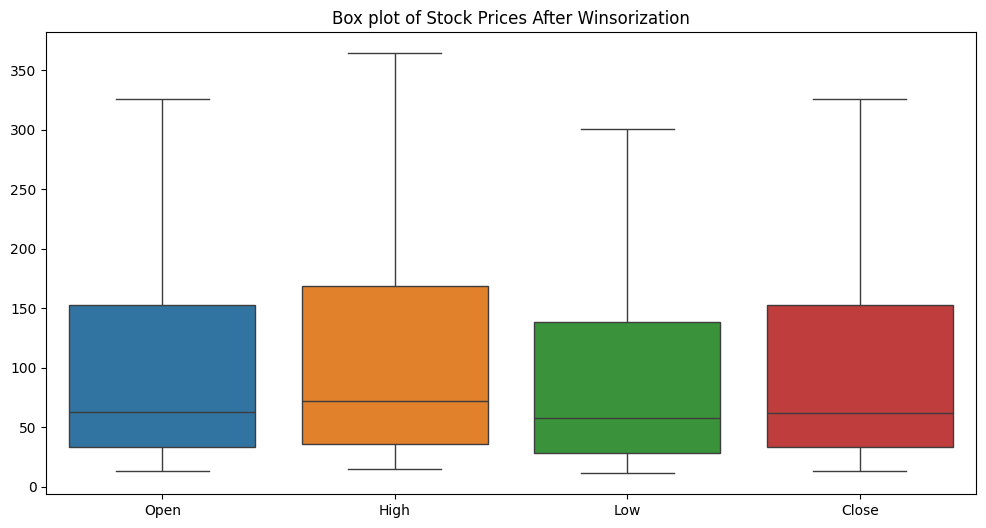

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title("Box plot of Stock Prices After Winsorization")
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since we still wanted to retain the data but reduce the effect of extreme values, Winsorization was applied. The top and bottom 5% of extreme values were capped. This helped smooth out extreme values while keeping overall trends intact.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Apply cyclical encoding for Month
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

df.drop(columns=['Month'], inplace=True)

print(df[['Month_sin', 'Month_cos']].head())

   Month_sin     Month_cos
0  -0.500000 -8.660254e-01
1  -0.866025 -5.000000e-01
2  -1.000000 -1.836970e-16
3  -0.866025  5.000000e-01
4  -0.500000  8.660254e-01


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used cyclical encoder for encoding month. A cyclical encoder is a great way to handle features like months, days, or hours, where values wrap around in a cycle.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df['Year'] = df['Date'].dt.year

df.drop(columns=['Date'], inplace=True)

df.head()

,Open,High,Low,Close,Month_sin,Month_cos,Year
0,13.30,14.9,11.48,13.30,-0.500000,-8.660254e-01,2005
1,13.30,14.9,12.55,13.42,-0.866025,-5.000000e-01,2005
2,13.48,14.9,12.27,13.30,-1.000000,-1.836970e-16,2005
3,13.30,14.9,12.40,13.30,-0.866025,5.000000e-01,2005
4,13.35,14.9,12.88,13.41,-0.500000,8.660254e-01,2005


#### 2. Feature Selection

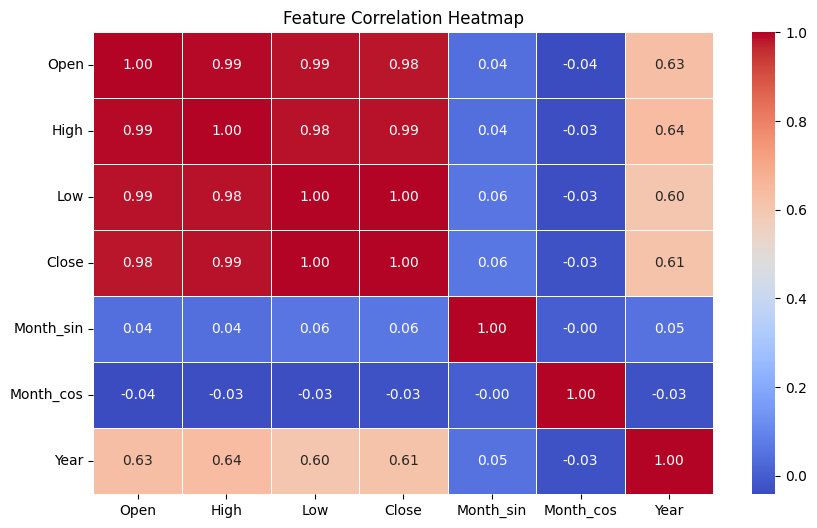

In [ ]:
# Select your features wisely to avoid overfitting
corr_matrix = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

##### What all feature selection methods have you used  and why?

Checked highly correlated features using a correlation heatmap to remove the redundant ones.

##### Which all features you found important and why?

From the correlation heatmap, the open, high, low and close prices have correlations close to 0.99. So we can remove some of these features to avoid multicollinearity. Here I cosider two cases.
- Case 1: Using only 'Open' as the independent variable.
- Case 2: Using 'Open', 'High' and 'Low' as independent variables.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X1 = df[['Open', 'Year', 'Month_sin', 'Month_cos']]
X2 = df[['Open', 'High', 'Low', 'Year', 'Month_sin', 'Month_cos']]
y = df['Close']

scaler = StandardScaler()

X1_scaled = scaler.fit_transform(X1)
X2_scaled = scaler.fit_transform(X2)

##### Which method have you used to scale you data and why?

I have used StandardScalar on Open, High, Low, Year, Month_sin, Month_cos.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X1_train, X1_test, y_train, y_test = train_test_split(X1_scaled, y, test_size=0.2, random_state=42)

X2_train, X2_test, y_train, y_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)

print("X1_train Shape:", X1_train.shape, " | X1_test Shape:", X1_test.shape)
print("X2_train Shape:", X2_train.shape, " | X2_test Shape:", X2_test.shape)

X1_train Shape: (148, 4)  | X1_test Shape: (37, 4)
X2_train Shape: (148, 6)  | X2_test Shape: (37, 6)


##### What data splitting ratio have you used and why?

80% of training set and 20% of test set, because this is standard and reasonable splitting ratio.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# Case 1
# Fit the Algorithm
lr1 = LinearRegression()

# Train the model on X1
lr1.fit(X1_train, y_train)

# Predict on the model
y_pred_lr1 = lr1.predict(X1_test)

# Evaluate Performance
mse_lr1 = mean_squared_error(y_test, y_pred_lr1)
rmse_lr1 = root_mean_squared_error(y_test, y_pred_lr1)
mae_lr1 = mean_absolute_error(y_test, y_pred_lr1)
r2_lr1 = r2_score(y_test, y_pred_lr1)

print(f"Linear Regression Performance for Case 1:\nMSE: {mse_lr1}\nRMSE: {rmse_lr1}\nMAE: {mae_lr1}\nR²: {r2_lr1}")

Linear Regression Performance for Case 1:
MSE: 439.1007207349174
RMSE: 20.954730271108655
MAE: 11.055004107943967
R²: 0.9461899652404884


In [ ]:
# Case 2
# Fit the Algorithm
lr2 = LinearRegression()

# Train the model on X2
lr2.fit(X2_train, y_train)

# Predict on the model
y_pred_lr2 = lr2.predict(X2_test)

# Evaluate Performance
mse_lr2 = mean_squared_error(y_test, y_pred_lr2)
rmse_lr2 = root_mean_squared_error(y_test, y_pred_lr2)
mae_lr2 = mean_absolute_error(y_test, y_pred_lr2)
r2_lr2 = r2_score(y_test, y_pred_lr2)

print(f"Linear Regression Performance for Case 2:\nMSE: {mse_lr2}\nRMSE: {rmse_lr2}\nMAE: {mae_lr2}\nR²: {r2_lr2}")

Linear Regression Performance for Case 2:
MSE: 77.91142102745106
RMSE: 8.826744644966855
MAE: 5.250122220358261
R²: 0.9904522673826787


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Linear Regression
lr = LinearRegression()

# Perform Cross-Validation
mse_scores = -cross_val_score(lr, X2, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)
mae_scores = -cross_val_score(lr, X2, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(lr, X2, y, cv=kf, scoring='r2')

lr.fit(X2, y)
print("Coefficients:", lr.coef_)

# Print Average Scores
print("Cross-Validation Results for Linear Regression (Case 2):")
print(f"Mean MSE: {mse_scores.mean():.4f}")
print(f"Mean RMSE: {rmse_scores.mean():.4f}")
print(f"Mean MAE: {mae_scores.mean():.4f}")
print(f"Mean R²: {r2_scores.mean():.4f}")

Coefficients: [-0.37860825  0.38507348  1.02614753  0.1390323   0.86868297  0.27201838]
Cross-Validation Results for Linear Regression (Case 2):
Mean MSE: 45.4104
Mean RMSE: 6.5127
Mean MAE: 4.2441
Mean R²: 0.9945


##### Which hyperparameter optimization technique have you used and why?

After performing cross-validation, the Linear Regression model (Case 2: Open, High, Low, Year, Month_sin, Month_cos) has shown:

Lowest RMSE: 6.5127 (better than the original 8.8267)
Highest R²: 0.9945 (better than the previous 0.9904)
Lowest MAE: 4.2441
This confirms that Linear Regression is the best model as it generalizes well on unseen data with low error and high accuracy.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 2 Implementation
from sklearn.ensemble import RandomForestRegressor

# Fit the Algorithm
rf2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on X2
rf2.fit(X2_train, y_train)

# Predict on the model
y_pred_rf2 = rf2.predict(X2_test)

# Evaluate Performance
mse_rf2 = mean_squared_error(y_test, y_pred_rf2)
rmse_rf2 = root_mean_squared_error(y_test, y_pred_rf2)
mae_rf2 = mean_absolute_error(y_test, y_pred_rf2)
r2_rf2 = r2_score(y_test, y_pred_rf2)

print(f"Random Forest Performance for Case 2:\nMSE: {mse_rf2}\nRMSE: {rmse_rf2}\nMAE: {mae_rf2}\nR²: {r2_rf2}")

Random Forest Performance for Case 2:
MSE: 176.62268934756779
RMSE: 13.289946927943985
MAE: 8.04051351351353
R²: 0.9783555967815216


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a more refined hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the Algorithm
rf_grid.fit(X2_train, y_train)

# Best parameters found
print("Best Parameters:", rf_grid.best_params_)

# Predict on the model
y_pred_rf_tuned = rf_grid.best_estimator_.predict(X2_test)

# Evaluate Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = root_mean_squared_error(y_test, y_pred_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f"Random Forest (Optimized with GridSearchCV) Performance:\nMSE: {mse_rf_tuned}\nRMSE: {rmse_rf_tuned}\nMAE: {mae_rf_tuned}\nR²: {r2_rf_tuned}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest (Optimized with GridSearchCV) Performance:
MSE: 173.85632701087724
RMSE: 13.185458923028703
MAE: 7.997201889649403
R²: 0.9786946034068024


##### Which hyperparameter optimization technique have you used and why?

Used GridSearchCV, as it considers all the possible paramter combinations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

RMSE reduced from 13.29 → 13.18, meaning slightly better accuracy.
MSE and MAE also improved, but the difference is not very large.
R² increased slightly, indicating a small improvement in model fit.

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 3 Implementation
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Fit the Algorithm
xgb_model.fit(X2_train, y_train)

# Predict on the model
y_pred_xgb = xgb_model.predict(X2_test)

# Evaluate Performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Performance (Base Model):\nMSE: {mse_xgb}\nRMSE: {rmse_xgb}\nMAE: {mae_xgb}\nR²: {r2_xgb}")


XGBoost Performance (Base Model):
MSE: 176.89314022354156
RMSE: 13.300118052992671
MAE: 8.754732538171716
R²: 0.9783224541098071


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define hyperparameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_grid_xgb,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Fit the Algorithm
xgb_random.fit(X2_train, y_train)

# Best parameters found
print("Best Parameters:", xgb_random.best_params_)

# Predict on the model
y_pred_xgb_tuned = xgb_random.best_estimator_.predict(X2_test)

# Evaluate Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = root_mean_squared_error(y_test, y_pred_xgb_tuned)
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

print(f"XGBoost (Optimized) Performance:\nMSE: {mse_xgb_tuned}\nRMSE: {rmse_xgb_tuned}\nMAE: {mae_xgb_tuned}\nR²: {r2_xgb_tuned}")

Best Parameters: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
XGBoost (Optimized) Performance:
MSE: 269.671998356871
RMSE: 16.421692919941933
MAE: 9.374690336278967
R²: 0.9669527766181681


In [ ]:
# Manually adjusting hyperparameters
xgb_tuned_manual = XGBRegressor(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42
)

# Train the manually tuned model
xgb_tuned_manual.fit(X2_train, y_train)

# Predict with manually tuned model
y_pred_xgb_manual = xgb_tuned_manual.predict(X2_test)

# Evaluate Performance
mse_xgb_manual = mean_squared_error(y_test, y_pred_xgb_manual)
rmse_xgb_manual = root_mean_squared_error(y_test, y_pred_xgb_manual)
mae_xgb_manual = mean_absolute_error(y_test, y_pred_xgb_manual)
r2_xgb_manual = r2_score(y_test, y_pred_xgb_manual)

print(f"XGBoost (Manually Tuned) Performance:\nMSE: {mse_xgb_manual}\nRMSE: {rmse_xgb_manual}\nMAE: {mae_xgb_manual}\nR²: {r2_xgb_manual}")


XGBoost (Manually Tuned) Performance:
MSE: 178.5666537993012
RMSE: 13.362883438812942
MAE: 8.447895859383248
R²: 0.9781173717233983


##### Which hyperparameter optimization technique have you used and why?

After applying RandomizedSearchCV, the performance of XGBoost worsened. So instead of searching randomly, manually adjust parameters for better tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After manual tuning, XGBoost performance improved compared to the RandomizedSearchCV version but still didn’t surpass Random Forest.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have considered two metrics RMSE and R-Squared. RMSE helps quantify big errors which can be critical for stock price predictions. (R-Squared)	measures how well the model explains variance in stock prices.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the results, after performing cross-validation, the Linear Regression model that includes High and Low has shown:

Lowest RMSE: 6.5127 (better than the original 8.8267)
Highest R²: 0.9945 (better than the previous 0.9904)
Lowest MAE: 4.2441
This confirms that Linear Regression is the best model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

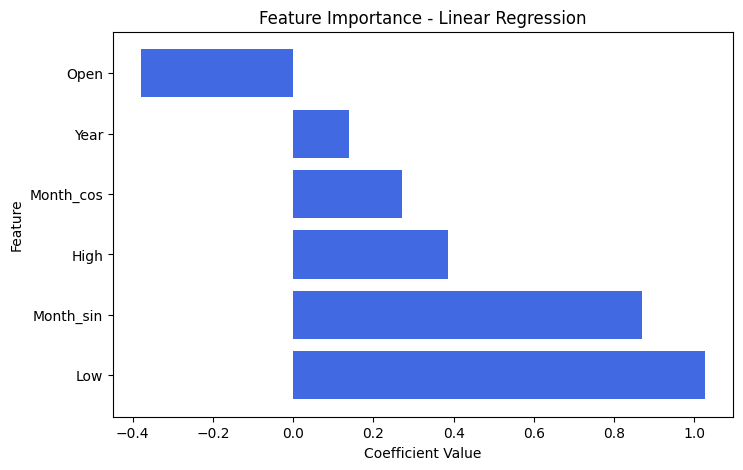

In [ ]:
# Extract feature names and coefficients
feature_names = X2.columns
coefficients = lr.coef_

# Create DataFrame
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='royalblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance - Linear Regression")
plt.show()

"Low" is the most important predictor, followed by Month_sin and High.
The "Open" feature negatively impacts the target variable, suggesting that when the Open price is higher, Close tends to be lower (keeping other factors constant).
Time-based features (Month_sin, Month_cos, Year) do have an impact, which suggests that seasonality and trends play a role in stock price predictions.


# **Conclusion**

Since Linear Regression (Case 2) performed best, it should be deployed for predicting stock closing prices. However, if non-linear relationships need to be captured better, then Random Forest can be revisited.